In [28]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [29]:
img = Image.open("pic/Lenna.jpg")

(200, 200)


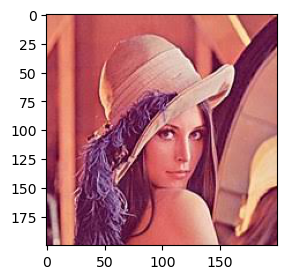

In [30]:
plt.figure(figsize = (3, 3))
plt.imshow(img)
print(img.size)

In [31]:
gray = np.array(img.convert("L"), dtype = np.float32)

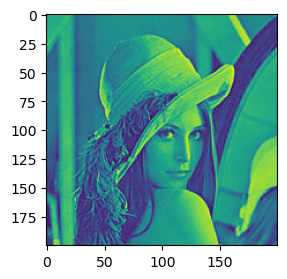

In [32]:
plt.figure(figsize = (3, 3))
plt.imshow(gray)

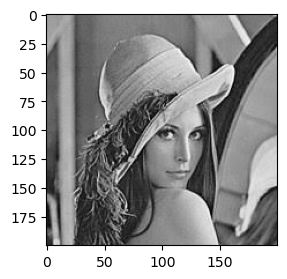

In [33]:
plt.figure(figsize = (3, 3))
plt.imshow(gray, cmap = 'gray')

In [34]:
# 将数组转化为张量，以便进行卷积操作
imgh, imgw = gray.shape
gray_t = torch.from_numpy(gray.reshape((1, 1, imgh, imgw)))
gray_t.shape

torch.Size([1, 1, 200, 200])

torch.Size([2, 196, 196])


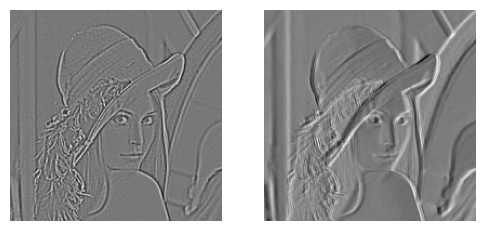

In [35]:
# 卷积核定义
# -1  -1  -1  -1  -1
# -1  -1  -1  -1  -1
# -1  -1  24  -1  -1
# -1  -1  -1  -1  -1
# -1  -1  -1  -1  -1
kernelsize = 5
kernel = torch.ones(kernelsize, kernelsize, dtype = torch.float32) * -1
kernel[2, 2] = 24
kernel = kernel.reshape((1, 1, kernelsize, kernelsize))

# 定义卷积操作
conv2d = nn.Conv2d(1, 2, (kernelsize, kernelsize), bias=False)

# 设置卷积时使用的 kernel， 第一个为边缘检测 kernel
conv2d.weight.data[0] = kernel
# conv2d.weight.data[1] = kernel

# 进行卷积操作
imgconv2dout = conv2d(gray_t)

# 对卷积结果进行维度压缩
imgconv2dout_img = imgconv2dout.data.squeeze()
print(imgconv2dout_img.shape)

# 可视化卷积后的图像
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(imgconv2dout_img[0], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(imgconv2dout_img[1], cmap=plt.cm.gray)
plt.axis('off')
plt.show()

torch.Size([1, 2, 98, 98])


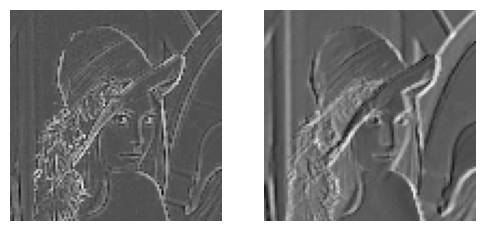

In [40]:
# 最大值池化
maxpool2 = nn.MaxPool2d(2, stride=2)
pool2_out = maxpool2(imgconv2dout)
pool2_out_im = pool2_out.squeeze()
print(pool2_out.shape)

# 可视化
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(pool2_out_im[0].data, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(pool2_out_im[1].data, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

torch.Size([1, 2, 98, 98])


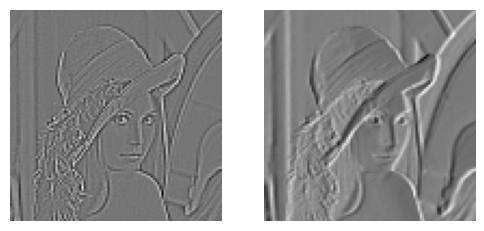

In [42]:
# 平均值池化
avgpool2 = nn.AvgPool2d(2, stride=2)
pool2_out = avgpool2(imgconv2dout)
pool2_out_im = pool2_out.squeeze()
print(pool2_out.shape)

# 可视化
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(pool2_out_im[0].data, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(pool2_out_im[1].data, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

torch.Size([1, 2, 50, 50])


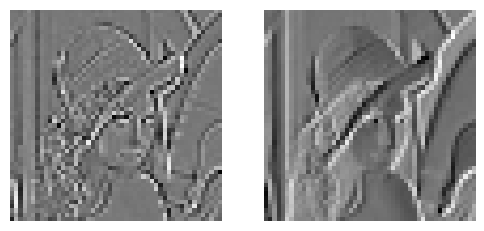

In [47]:
# 自适应平均值池化
adaptiveavgpool2 = nn.AdaptiveAvgPool2d(output_size=(50, 50))  # 可指定输出特征映射的尺寸
pool2_out = adaptiveavgpool2(imgconv2dout)
pool2_out_im = pool2_out.squeeze()
print(pool2_out.shape)

# 可视化
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(pool2_out_im[0].data, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(pool2_out_im[1].data, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

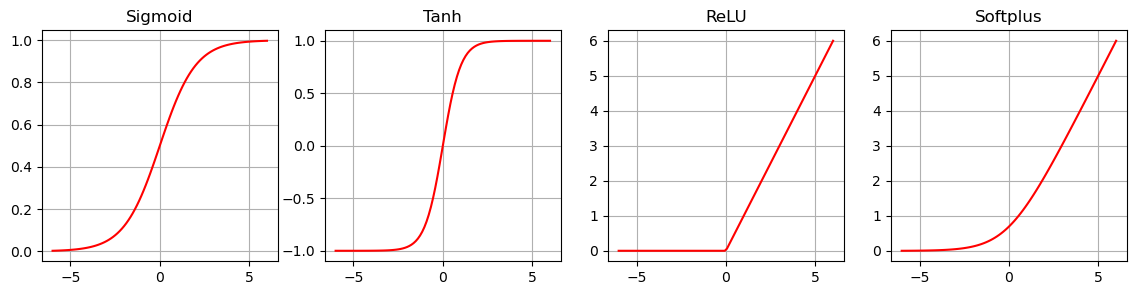

In [50]:
# 激活函数
x = torch.linspace(-6, 6, 100)
sigmoid = nn.Sigmoid()
ysigmoid = sigmoid(x)
tanh = nn.Tanh()
ytanh = tanh(x)
relu = nn.ReLU()
yrelu = relu(x)
softplus = nn.Softplus()
ysoftplus = softplus(x)

# 可视化
plt.figure(figsize=(14, 3))
plt.subplot(1, 4, 1)
plt.plot(x.data.numpy(), ysigmoid.data.numpy(), "r-")
plt.title("Sigmoid")
plt.grid()
plt.subplot(1, 4, 2)
plt.plot(x.data.numpy(), ytanh.data.numpy(), "r-")
plt.title("Tanh")
plt.grid()
plt.subplot(1, 4, 3)
plt.plot(x.data.numpy(), yrelu.data.numpy(), "r-")
plt.title("ReLU")
plt.grid()
plt.subplot(1, 4, 4)
plt.plot(x.data.numpy(), ysoftplus.data.numpy(), "r-")
plt.title("Softplus")
plt.grid()

In [51]:
# 循环层 RNN, LSTM（长短期记忆）, GRU（门限循环）

In [52]:
# 全连接层 (线性变换 + 激活函数)
# torch.nn.Linear(in_features=x, out_features=y, bias=True)

In [ ]:
# nn.util数据预处理和初始化